In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('prediction.csv')

In [3]:
df.head()

,Unnamed: 0,country,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0,0,0,0,0,0,0,0,0,0
1,1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,0,0,1,0,0,0,0,0,0,0
2,2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0,0,0,0,0,1,0,0,0,0
3,3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,0,0,0,0,0,0,0,1,0,0
4,4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0,0,0,0,0,0,0,0,0,1


##### Data Split 1: all of our final dataset, no scaling

In [5]:
y = df['gdp_per_capita']
X = df.drop(['gdp_per_capita','country'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

##### Data Split 2: all of our final dataset, with scaling

In [11]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test


##### Data Split 3: feature selected dataset, no scaling

In [9]:
y3 = y
X3 = df.drop(['gdp_per_capita','country','population', 'area', 'coastline_area_ratio', 'arable',
                      'crops', 'other', 'climate', 'deathrate', 'industry'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)


##### Data Split 4: feature selected dataset, with scaling

In [12]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

## SVM

##### Model Training


In [19]:
svm1 = SVR()
svm1.fit(X_train,y_train)

svm2 = SVR()
svm2.fit(X2_train,y2_train)

svm3 = SVR()
svm3.fit(X3_train,y3_train)

svm4 = SVR()
svm4.fit(X4_train,y4_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
svm1_pred = svm1.predict(X_test)
svm2_pred = svm2.predict(X2_test)
svm3_pred = svm3.predict(X3_test)
svm4_pred = svm4.predict(X4_test)

In [21]:
print('SVM Performance:')

print('\nall features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y_test, svm1_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)))
print('R2_Score: ', metrics.r2_score(y_test, svm1_pred))

print('\nall features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y2_test, svm2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, svm2_pred)))
print('R2_Score: ', metrics.r2_score(y2_test, svm2_pred))

print('\nselected features, No scaling:')
print('MAE:', metrics.mean_absolute_error(y3_test, svm3_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, svm3_pred)))
print('R2_Score: ', metrics.r2_score(y3_test, svm3_pred))

print('\nselected features, with scaling:')
print('MAE:', metrics.mean_absolute_error(y4_test, svm4_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, svm4_pred)))
print('R2_Score: ', metrics.r2_score(y4_test, svm4_pred))

SVM Performance:

all features, No scaling:
MAE: 7049.984896213288
RMSE: 9811.73631225395
R2_Score:  -0.1651034559709874

all features, with scaling:
MAE: 7043.115619704049
RMSE: 9800.889548559791
R2_Score:  -0.16252886242278652

selected features, No scaling:
MAE: 7047.719664344731
RMSE: 9808.014270426607
R2_Score:  -0.16421966922224085

selected features, with scaling:
MAE: 7040.756091946423
RMSE: 9795.711282297869
R2_Score:  -0.16130075069589012


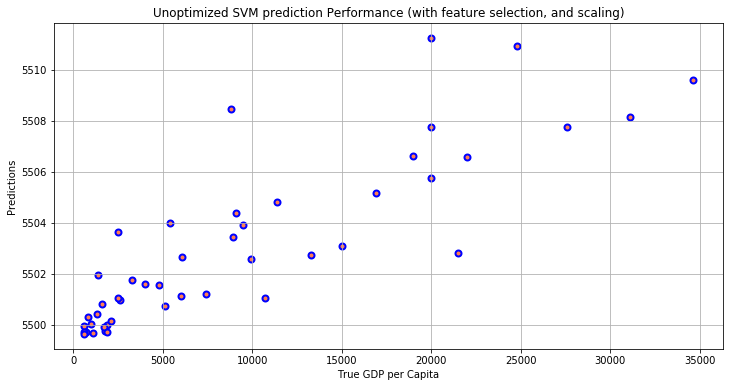

In [33]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred, linewidths=2, edgecolors='b', color='coral')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Unoptimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

Feature scaling, and feature selection, made almost no difference in the prediction performance of the SVM algorithm. 

The results of SVM is worse than that of Linear Regression, so we will try to improve SVM's performance by optimizing its parameters using grid search.

##### Optimizing SVM

In [26]:
param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [27]:
grid.fit(X4_train,y4_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.324, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.156, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.115, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.372, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ........ C=1, gamma=0.01, kernel=rbf, score=-0.026, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1, gamma=0.001, kernel=rbf, score=-0.325, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ....... C=1,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.115, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.372, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] .... C=100, gamma=0.0001, kernel=rbf, score=-0.026, total=   0.0s


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [28]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [29]:
grid.best_estimator_

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
grid_predictions = grid.predict(X4_test)

In [31]:
print('MAE:', metrics.mean_absolute_error(y4_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y4_test, grid_predictions))

MAE: 6397.313161899935
RMSE: 9144.773840136933
R2_Score:  -0.01208897263212183


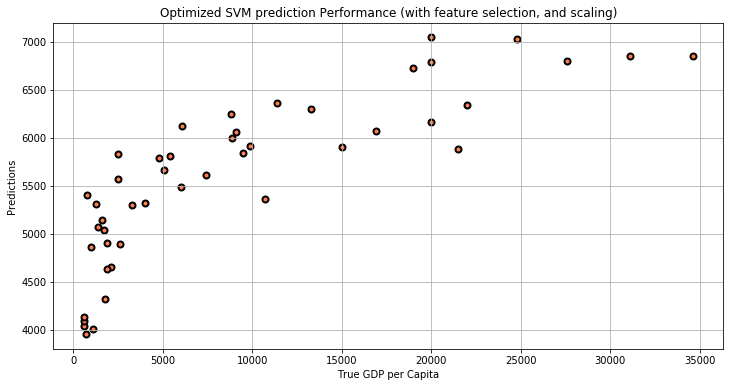

In [32]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

SVM has improved a little with grid search, but it still performs below linear regression.